<a href="https://colab.research.google.com/github/Haftah01/ai_bootcamp_project/blob/main/RAISIN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AZEEZ ABDULHAKEEM**

# **LOGISTICS REGRESSION, CLASSIFICATION MODEL ON RAISIN DATA SET**

In [81]:
#@title Import Packages
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [82]:
#@title Load Dataset
data=pd.read_csv('https://raw.githubusercontent.com/Haftah01/ai_bootcamp_project/refs/heads/main/Raisin_Dataset%20-%20Raisin_Grains_Dataset_Classed.csv')

In [83]:
#@title Preview Data Head
data.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class_bool
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [84]:
#@title Preview Data Tail
data.tail(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class_bool
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,1


In [85]:
#@title Split Data
train, test = train_test_split(data, test_size=0.2)
x_train=train.drop('Class_bool',axis=1)
y_train=train['Class_bool']
x_test=test.drop('Class_bool',axis=1)
y_test=test['Class_bool']

In [86]:
#@title Train Model
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
#@title Test Model
y_pred=model.predict(x_test)

In [88]:
#@title Cross Validation
cv=KFold(n_splits=5,random_state=1,shuffle=True)
scores=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print("cross-Validation", scores)

cross-Validation [0.79861111 0.90277778 0.89583333 0.84722222 0.84722222]


0.8722222222222222
[[73 10]
 [13 84]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        83
           1       0.89      0.87      0.88        97

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



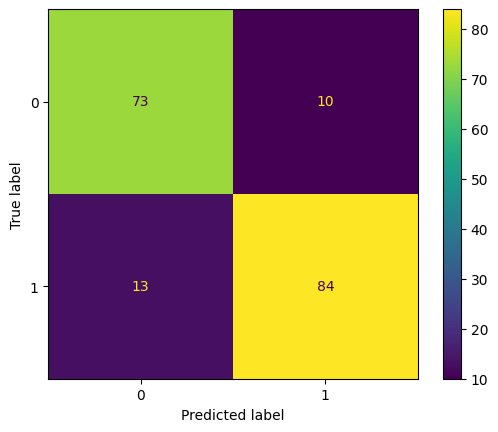

In [89]:
#@title Evaluate Model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm_display=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),display_labels=model.classes_)
cm_display.plot()
